Steps:
1. Add image to Python and make sure the image shows up
2. Create a Matrix
3. Split the image into parts and assign them into the matrix
4. Test the matrix by printing out the image
5. Reconstruct the image

**Step 1:**

In [1]:
from google.colab import files
from IPython.display import Image

#Importing the image from your files
uploaded = files.upload()

img_name = list(uploaded.keys())[0]
display(Image(filename=img_name))

ModuleNotFoundError: No module named 'google.colab'

**Step 2**

Original image shape: (4046, 9216, 3)


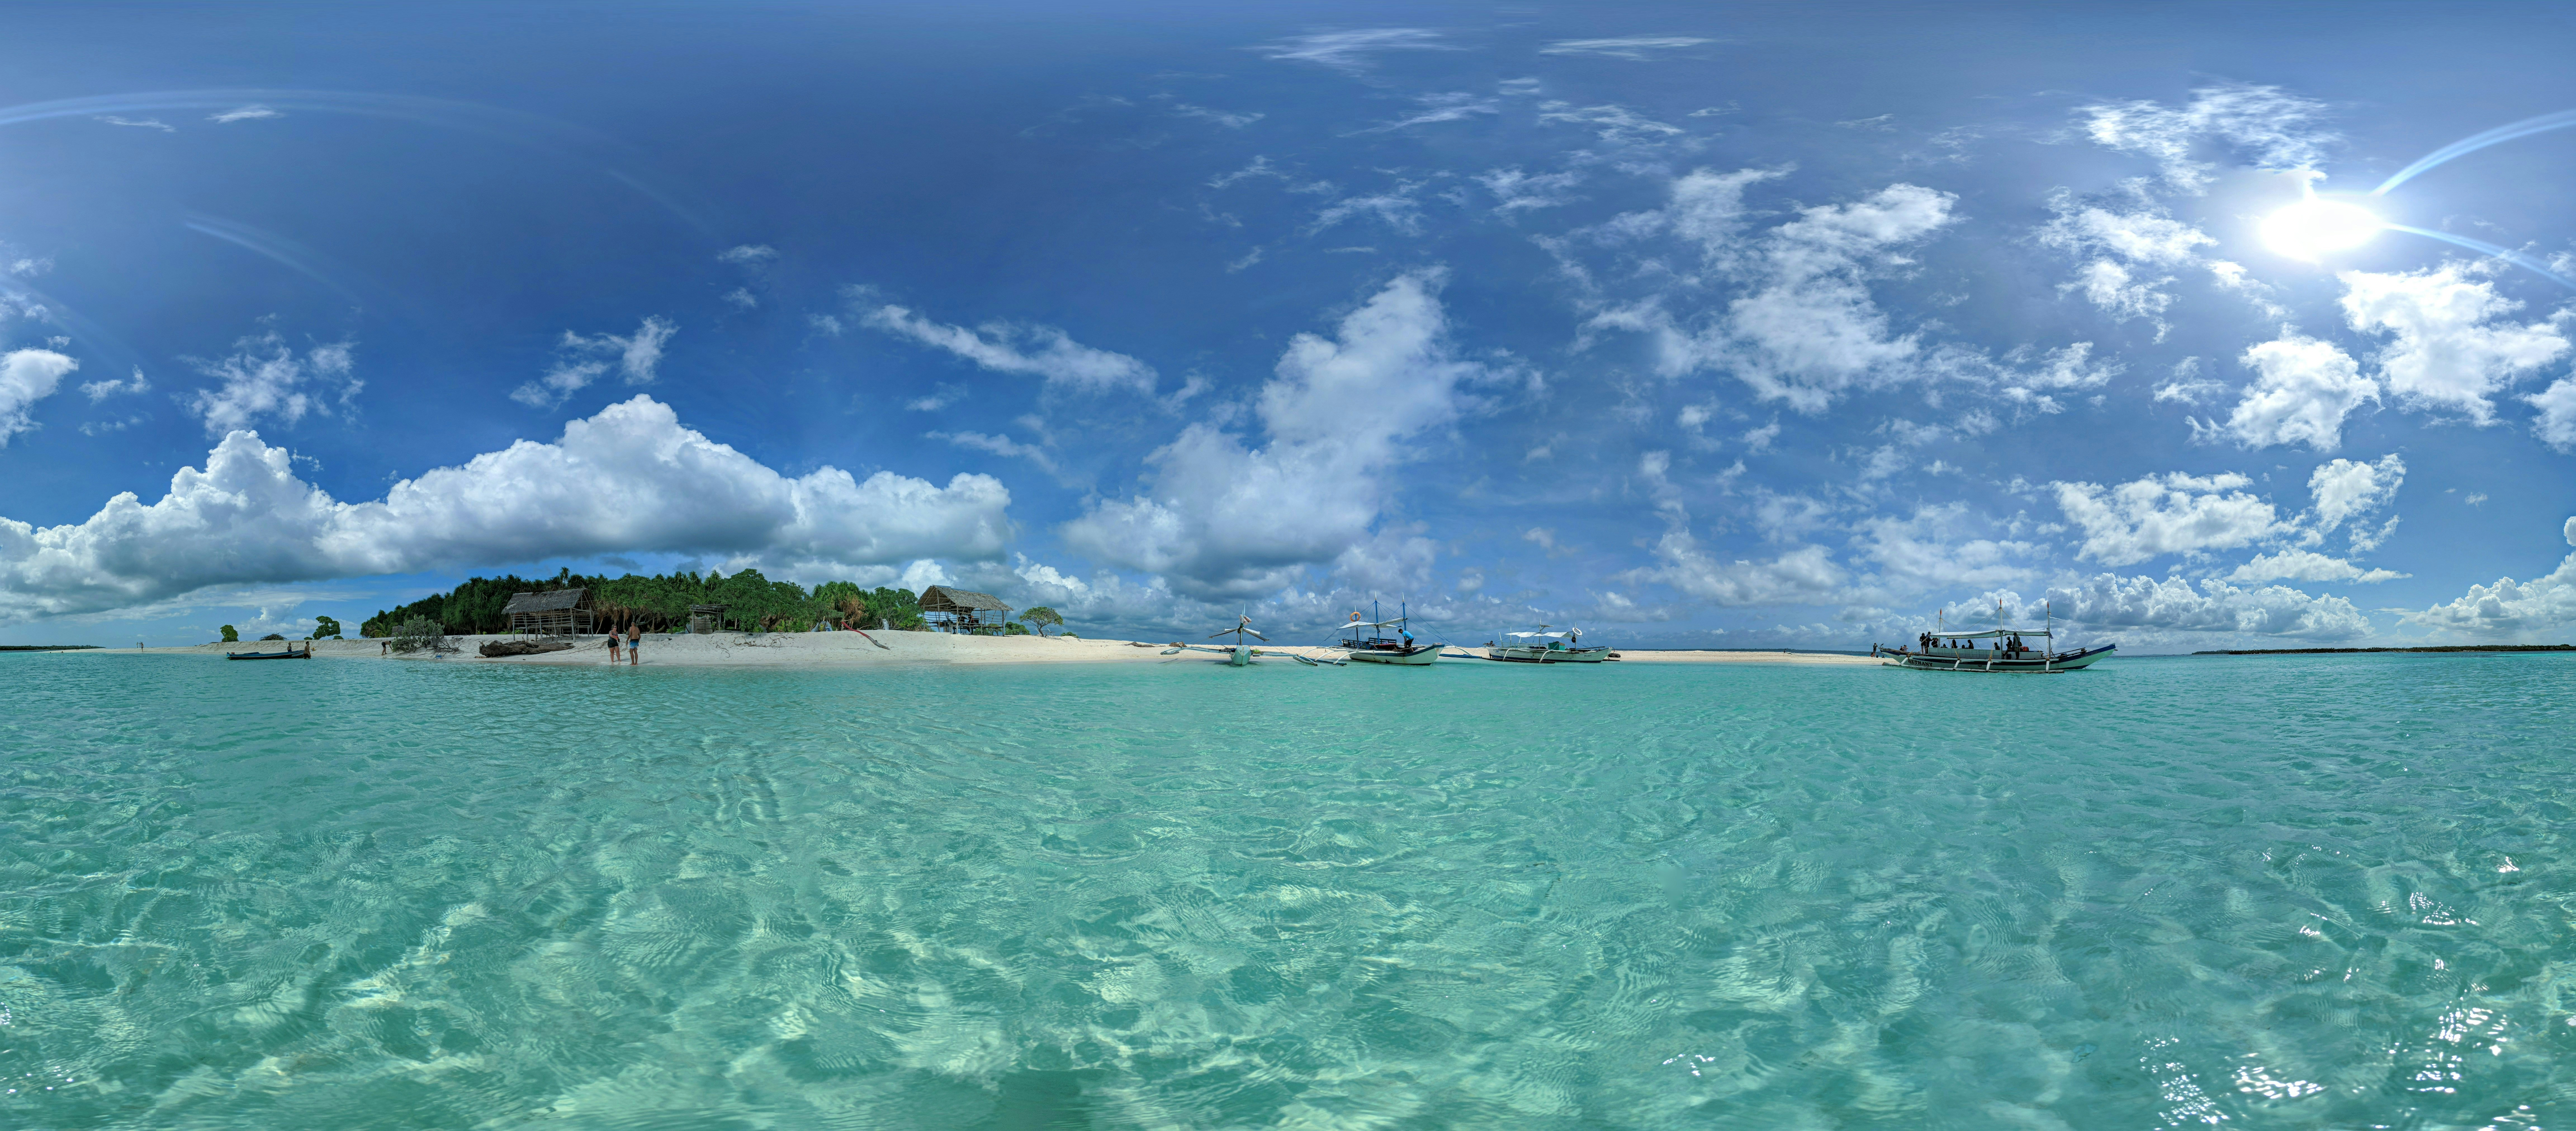

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

from PIL import Image as PILImage

img_name = "Ocean360Picture.jpg"

img = PILImage.open(img_name)
img_matrix = np.array(img)
rows,cols,channel = img_matrix.shape
print(f"Original image shape:", img_matrix.shape)  # (rows, cols, color_channels)
display(Image(filename=img_name))

**Step 3**

In [5]:
num_tiles = 36
tile_height = rows // num_tiles
tile_width = cols // num_tiles

tiles = []  # will store all tiles
for i in range(num_tiles):
    row_tiles = []
    for j in range(num_tiles):
        # extract tile (i,j)
        tile = img_matrix[
            i * tile_height:(i + 1) * tile_height,
            j * tile_width:(j + 1) * tile_width
        ]
        row_tiles.append(tile)
    tiles.append(row_tiles)

**Step 4**

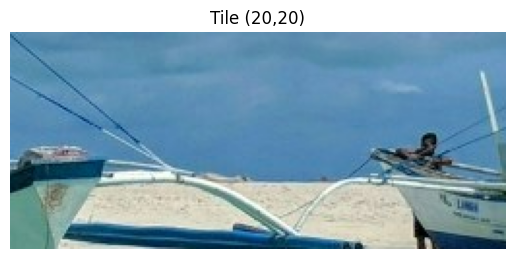

In [6]:
plt.imshow(tiles[20][20])
plt.title("Tile (20,20)")
plt.axis("off")
plt.show()

**Step 5**

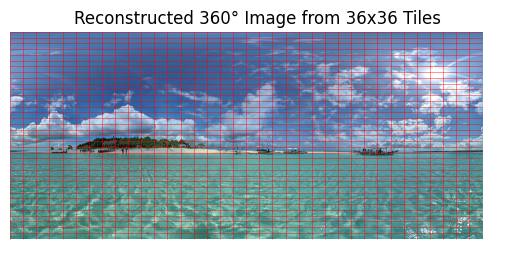

In [7]:
rows_combined = [np.hstack(row) for row in tiles]
reconstructed = np.vstack(rows_combined)

plt.imshow(reconstructed)
plt.title("Reconstructed 360° Image from 36x36 Tiles")
plt.axis("off")

num_tiles = 36
tile_height = reconstructed.shape[0] // num_tiles
tile_width = reconstructed.shape[1] // num_tiles

# Draw vertical lines
for x in range(0, reconstructed.shape[1], tile_width):
    plt.vlines(x, 0, reconstructed.shape[0], color='red', linewidth=0.5, alpha=0.6)

# Draw horizontal lines
for y in range(0, reconstructed.shape[0], tile_height):
    plt.hlines(y, 0, reconstructed.shape[1], color='red', linewidth=0.5, alpha=0.6)

plt.show()